In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
# 将测试样本拿来进行k-means聚类
file_data = "C:/Users/luanjiejie/Documents/mnist_test.csv"
handle_file = open(file_data, "r")
data = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image = len(data)
print(num_image)

10000


In [3]:
# 制作一个矩阵，其中每一列以向量的形式表示一个图像
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_image2 = np.empty((size_row * size_col, num_image), dtype=float)
r_label = np.zeros(num_image, dtype=int)

In [4]:
def normalize(data):
    data_normalized = data / max(data) 
    return(data_normalized)
# 将输入数据的值规范化为0~1

In [5]:
# 数据初始化
def initialLabel(k):
    label_first = np.zeros(k)
    
    for i in range(k):
        label_first[i] = i        # 让前十个数据作为起始的十个类
    x = 0
    for i in range(200):        #10000是测试集样本的数目
        if x < k:
            r_label[i] = label_first[x]
            x += 1
        else:
            x = 0
            r_label[i] = label_first[x]
            x += 1

In [6]:
def initializeImage(k):
    count = 0 
    for line in data:
        line_data   = line.split(',')
        im_vector   = np.asfarray(line_data[1:])
        im_vector   = normalize(im_vector)

        list_image[:, count]  = im_vector    

        count += 1

In [12]:
def initialCentroid(k):
    f2 = plt.figure(2)
    im_avg = np.zeros((size_row * size_col, k), dtype=float)
    im_cnt = np.zeros(k, dtype=int)
    im_avgg = np.zeros((size_row * size_col, k), dtype=float)
    
    for i in range(200):
        im_avg[:, r_label[i]] += list_image[:,i]  #计算
        im_cnt[r_label[i]] += 1
        
    for i in range(k):
        im_avg[:, i] /= im_cnt[i] 
        plt.subplot(1, k, i+1)
        plt.title(i)
        plt.imshow(im_avg[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
        im_avgg[:, i] = im_avg[:, i]
        frame   = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)

    plt.show()
    return im_avgg

In [15]:
def computeDistance(avgg, k):
    lis = np.zeros(k)
    lab = np.zeros(200)
    newPoints = np.zeros(200)
    
    for i in range(200):
        img = np.asfarray(list_image[:, i].reshape(1,784))
        for j in range(k):
            avg_r = np.asfarray(avgg[:, j].reshape(1,784))
            d = (img - avg_r)**2
            s = np.sum(d)
            r = np.sqrt(s)
            lis[j] = r
        lab[i] = np.argmin(lis)
    return lab

In [14]:
def computeCentroid(lab, k):
    f4 = plt.figure(4)
    im_avg = np.zeros((size_row * size_col, k), dtype=float)
    im_cnt = np.zeros(k, dtype=int)
    im_avgg = np.zeros((size_row * size_col, k), dtype=float)
    
    for i in range(200):
        for j in range(10):
            if lab[i] == j:
                im_avg[:, j] += list_image[:, i]
            im_cnt[j] += 1
            
        for i in range(k):
            im_avg[:, i] /= im_cnt[i] 
            plt.subplot(1, k, i+1)
            plt.title(i)
            plt.imshow(im_avg[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
            im_avgg[:, i] = im_avg[:, i]
            frame   = plt.gca()
            frame.axes.get_xaxis().set_visible(False)
            frame.axes.get_yaxis().set_visible(False)

    plt.show()
    return im_avgg

[0 1 2 ..., 7 8 9]


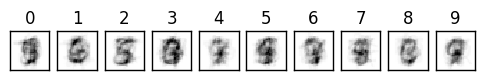

[ 0.  1.  7.  8.  6.  7.  6.  7.  5.  9.  1.  1.  9.  3.  4.  5.  6.  0.
  1.  9.  9.  1.  6.  2.  4.  1.  6.  7.  8.  4.  0.  6.  2.  3.  9.  1.
  6.  4.  1.  4.  4.  9.  9.  7.  4.  2.  6.  7.  8.  3.  0.  1.  2.  3.
  4.  8.  6.  7.  3.  7.  0.  1.  6.  3.  4.  5.  6.  6.  8.  1.  0.  1.
  2.  9.  4.  4.  2.  4.  7.  9.  0.  1.  1.  6.  7.  8.  9.  8.  1.  7.
  0.  1.  4.  0.  4.  5.  6.  7.  1.  3.  6.  1.  2.  3.  3.  9.  2.  7.
  0.  9.  5.  4.  2.  9.  4.  5.  6.  7.  9.  9.  2.  9.  6.  1.  4.  5.
  3.  2.  8.  2.  1.  1.  1.  4.  4.  4.  8.  7.  1.  9.  1.  0.  2.  4.
  9.  4.  8.  7.  8.  5.  3.  6.  2.  3.  4.  5.  6.  8.  8.  5.  6.  1.
  2.  3.  4.  1.  3.  7.  4.  0.  0.  9.  2.  3.  4.  4.  4.  7.  4.  8.
  4.  1.  2.  3.  0.  9.  1.  2.  8.  6.  9.  6.  2.  6.  8.  7.  4.  7.
  6.  9.]


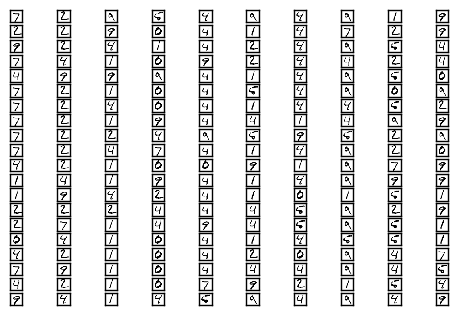

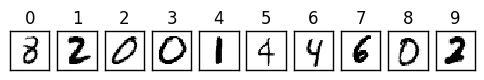

In [17]:
k = 10
initialLabel(k)

print(r_label)
initializeImage(k)
avgg = initialCentroid(k)  #初始质心图像
lab = computeDistance(avgg, k)  #计算距离
print(lab)

f3 = plt.figure(3)

im_avg = np.zeros((size_row * size_col, k), dtype=float)
for i in range(200):
    for j in range(10):
        if lab[i] == j:
            plt.subplot(21, k, i+1)
            im_vector = list_image[:, j]
            im_matrix = im_vector.reshape((size_row, size_col))
            list_image2[:, j] = list_image[:, j]
            plt.imshow(im_matrix, cmap='Greys', interpolation='None')
            frame   = plt.gca()
            frame.axes.get_xaxis().set_visible(False)
            frame.axes.get_yaxis().set_visible(False)
            
avgg = computeCentroid(lab, k)
lab2 = computeDistance(avgg, k)